In [24]:
import pandas as pd
import geopandas as gpd

In [25]:
import seaborn as sns
sns.set(style="ticks")
sns.set_style("whitegrid")

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
import scipy
from scipy.stats.stats import pearsonr

In [28]:
df = pd.read_csv('hate_crimes.csv')

In [29]:
df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [12]:
df.describe()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
count,51.000000,51.000000,51.000000,51.000000,48.000000,51.000000,51.000000,51.000000,51.00000,47.000000,50.000000
mean,55223.607843,0.049569,0.750196,0.869118,0.054583,0.091765,0.453765,0.315686,0.49000,0.304093,2.367613
std,9208.478170,0.010698,0.181587,0.034073,0.031077,0.024715,0.020891,0.164915,0.11871,0.252709,1.714245
min,35521.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.04000,0.067447,0.266941
25%,48657.000000,0.042000,0.630000,0.840500,0.030000,0.075000,0.440000,0.195000,0.41500,0.142707,1.293139
50%,54916.000000,0.051000,0.790000,0.874000,0.045000,0.090000,0.454000,0.280000,0.49000,0.226197,1.987068
75%,60719.000000,0.057500,0.895000,0.898000,0.080000,0.100000,0.466500,0.420000,0.57500,0.356935,3.184344
max,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.810000,0.70000,1.522302,10.953480


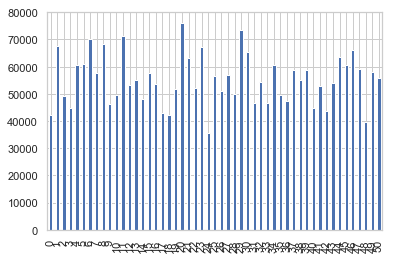

In [30]:
df.median_household_income.plot(kind='bar')

/Users/ywu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ywu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


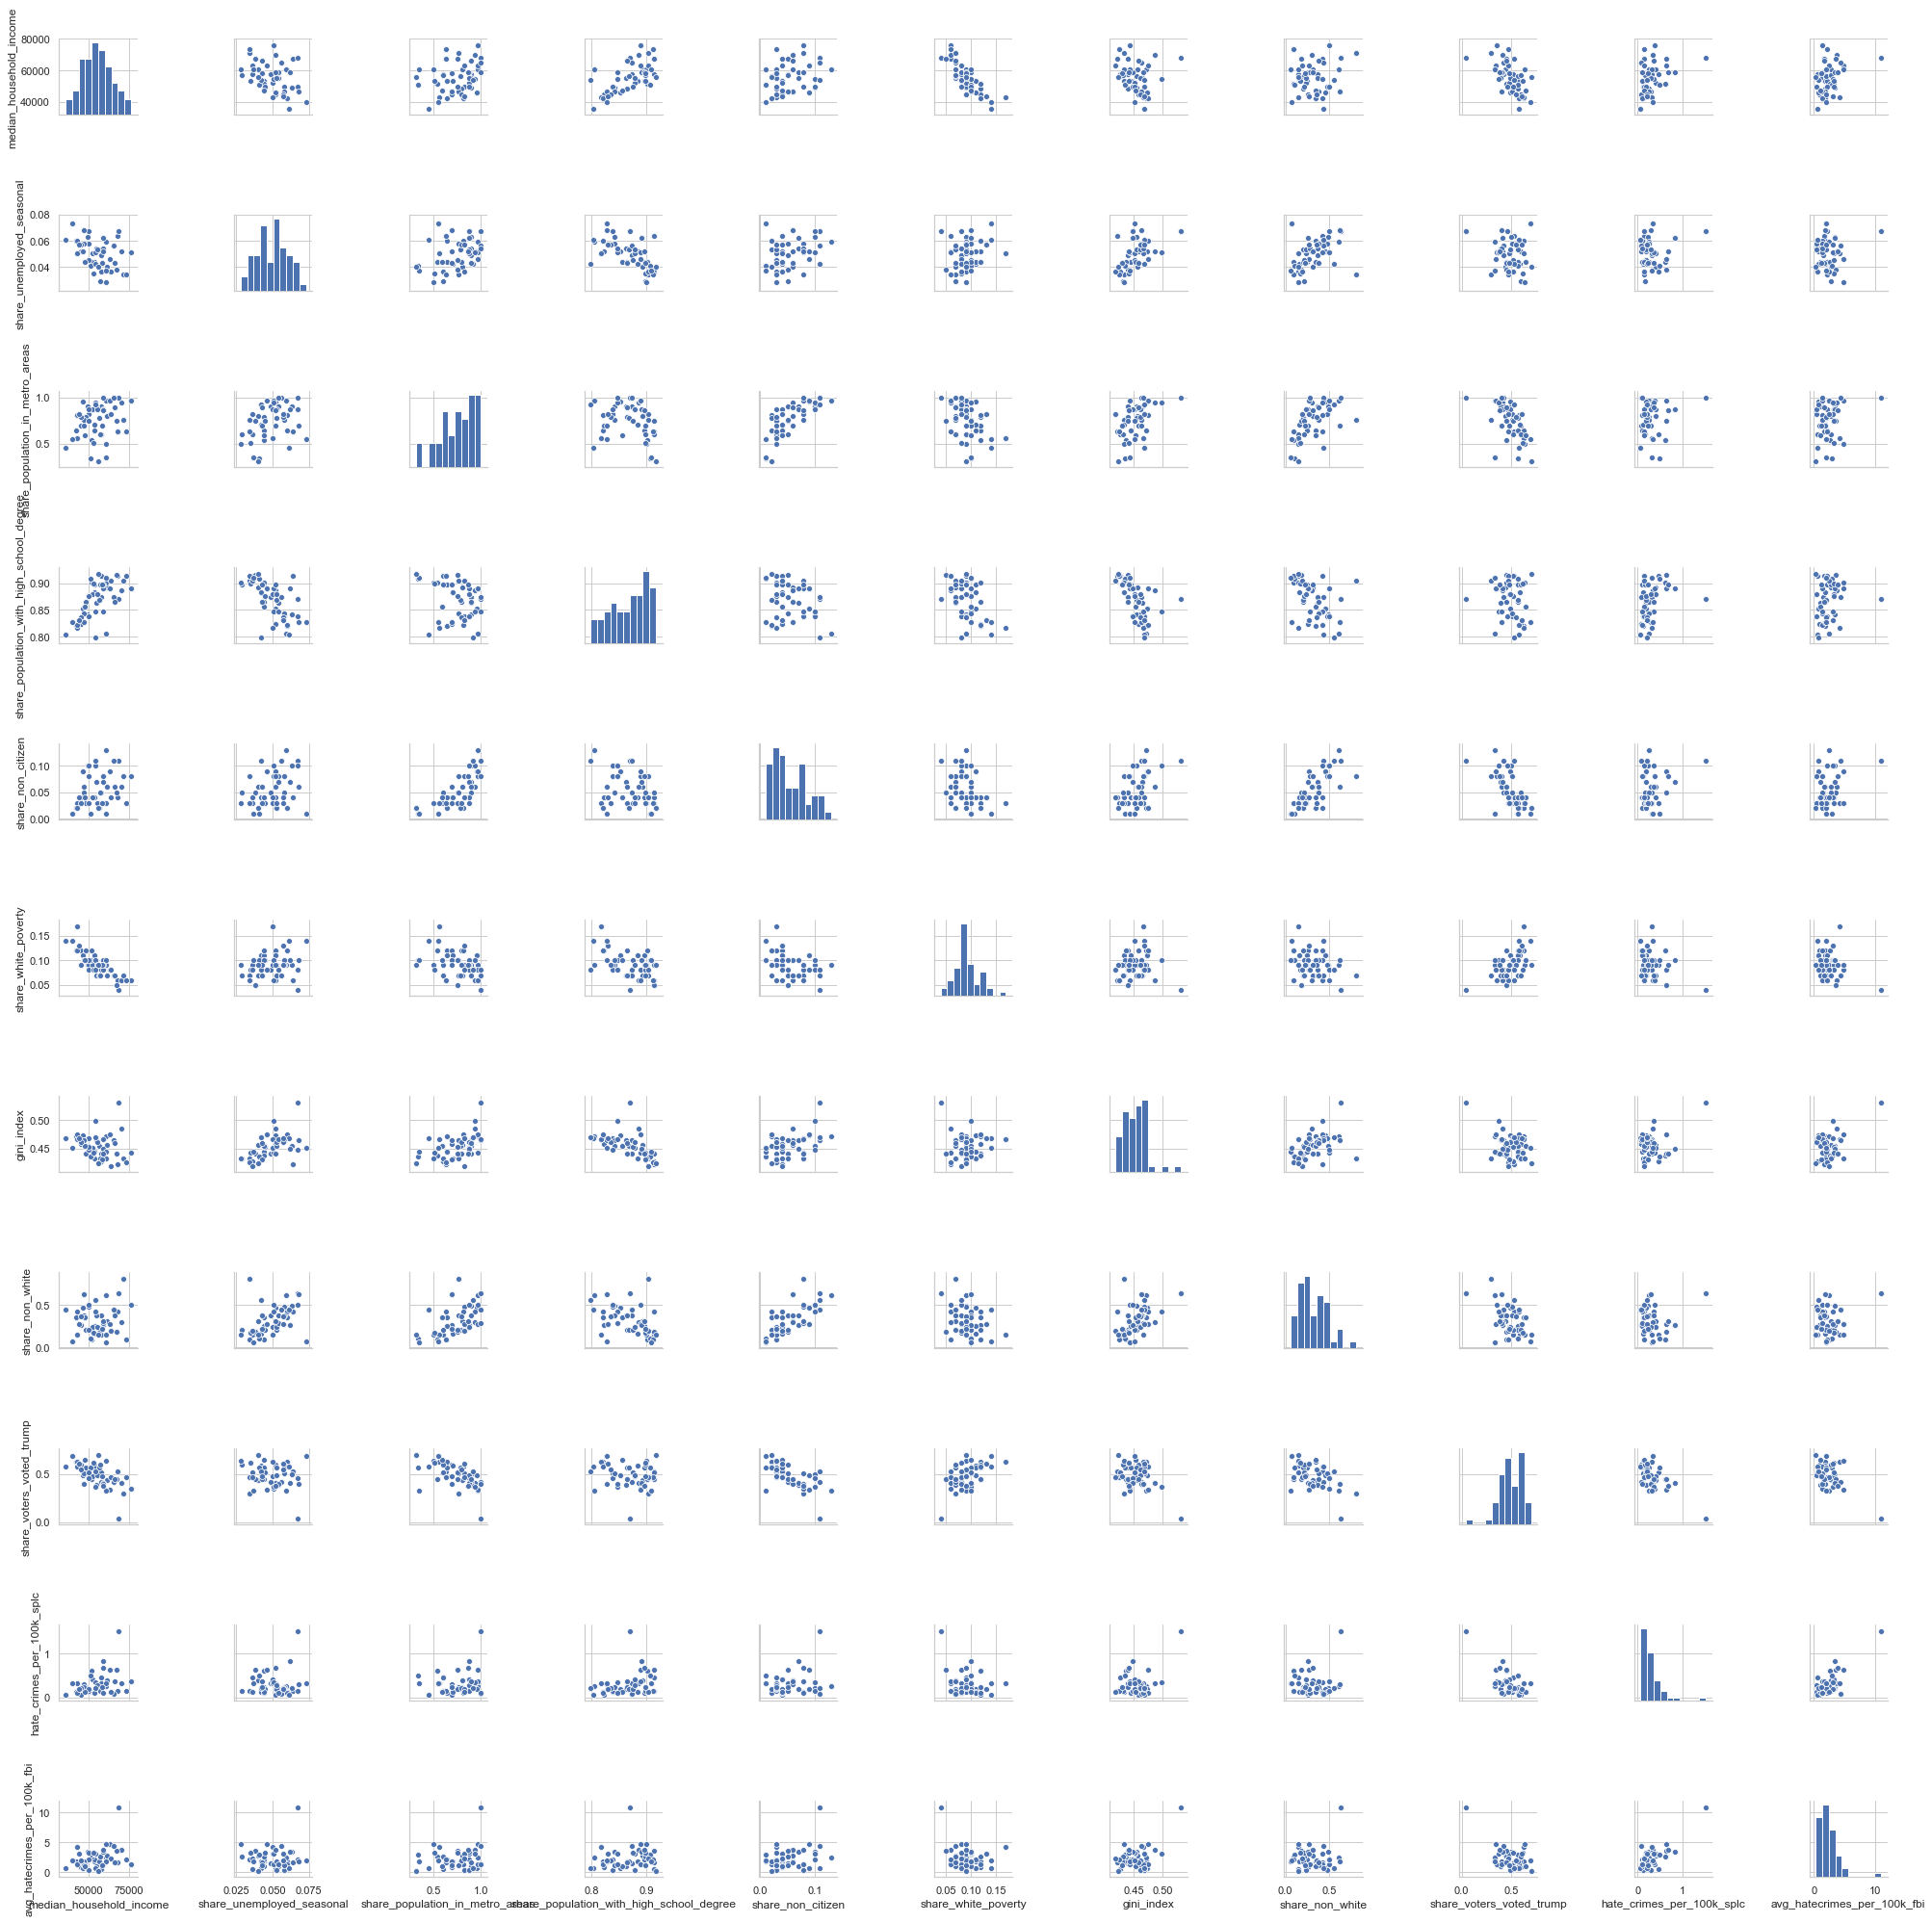

In [31]:
sns.pairplot(df)

In [33]:
corr = df.corr()
corr
# Pearson correlation coefficient: Assumptions are your data is normally distributed, you have continuous numeric variables, and your variables are linearly related. 

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
median_household_income,1.000000,-0.376722,0.286480,0.653490,0.302288,-0.818045,-0.178821,0.103775,-0.597528,0.350714,0.318246
share_unemployed_seasonal,-0.376722,1.000000,0.358113,-0.621168,0.278899,0.209440,0.541659,0.431847,-0.148192,0.083292,0.073936
share_population_in_metro_areas,0.286480,0.358113,1.000000,-0.268846,0.745464,-0.385559,0.515843,0.547672,-0.570695,0.162217,0.209827
share_population_with_high_school_degree,0.653490,-0.621168,-0.268846,1.000000,-0.277009,-0.494008,-0.592052,-0.434846,-0.155656,0.308944,0.164148
share_non_citizen,0.302288,0.278899,0.745464,-0.277009,1.000000,-0.389718,0.480257,0.733655,-0.631194,0.243507,0.300892
share_white_poverty,-0.818045,0.209440,-0.385559,-0.494008,-0.389718,1.000000,0.032584,-0.269449,0.552849,-0.286170,-0.260094
gini_index,-0.178821,0.541659,0.515843,-0.592052,0.480257,0.032584,1.000000,0.468467,-0.411543,0.329439,0.421272
share_non_white,0.103775,0.431847,0.547672,-0.434846,0.733655,-0.269449,0.468467,1.000000,-0.488838,0.047561,0.083525
share_voters_voted_trump,-0.597528,-0.148192,-0.570695,-0.155656,-0.631194,0.552849,-0.411543,-0.488838,1.000000,-0.657067,-0.504532
hate_crimes_per_100k_splc,0.350714,0.083292,0.162217,0.308944,0.243507,-0.286170,0.329439,0.047561,-0.657067,1.000000,0.758700


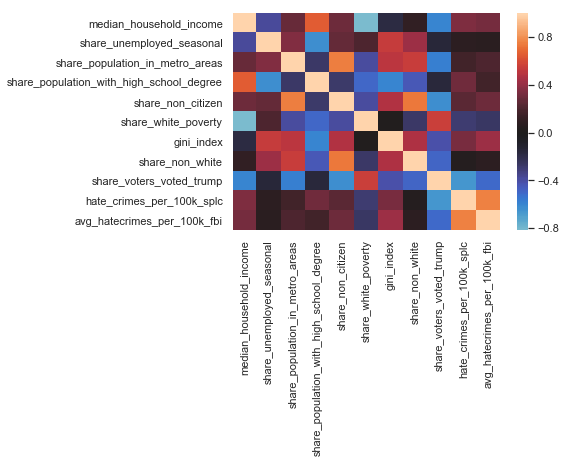

In [35]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0)
#Strong correlations: income - degree, income - poverty, income - support Trump

In [15]:
df['income_rank']=df['median_household_income'].rank(ascending=False)#income higher, rank number smaller
df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,income_rank
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,49.0
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,6.0
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,38.0
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,45.0
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,15.0


In [23]:
df['unemployed_rank']=df['share_unemployed_seasonal'].rank(ascending=True)#unemployed share smaller, rank number smaller
df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,...,unemployed_rank,metro_rank,degree_rank,noncitizen_rank,poverty_rank,gini_rank,nonwhite_rank,vote_rank,hate_splc_rank,hate_fbi_rank
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,...,42.5,36.5,47.0,43.5,45.0,45.0,21.5,46.5,9.0,20.0
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,...,47.0,38.5,3.5,28.5,4.5,2.0,14.0,32.5,13.0,17.0
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,...,46.0,12.0,38.0,6.0,26.0,27.5,8.0,27.0,23.0,42.0
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,...,29.5,34.0,45.0,28.5,45.0,30.0,29.5,42.5,2.0,8.0
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,...,41.0,5.0,49.0,1.0,26.0,44.0,4.0,3.5,27.0,31.0


In [18]:
df['metro_rank']=df['share_population_in_metro_areas'].rank(ascending=False)#metro pop share larger, rank number smaller
df['degree_rank']=df['share_population_with_high_school_degree'].rank(ascending=False)#degree share larger, rank number smaller
df['noncitizen_rank']=df['share_non_citizen'].rank(ascending=False)#non citizen share larger, rank number smaller
df['poverty_rank']=df['share_white_poverty'].rank(ascending=True)#poverty share smaller, rank number smaller
df['gini_rank']=df['gini_index'].rank(ascending=True)#gini smaller, rank number smaller
df['nonwhite_rank']=df['share_non_white'].rank(ascending=False)#non white larger, rank number smaller
df['vote_rank']= df['share_voters_voted_trump'].rank(ascending=True)#vote share smaller, rank number smaller
df['hate_splc_rank']= df['hate_crimes_per_100k_splc'].rank(ascending=True)#hate crime num smaller, rank number smaller
df['hate_fbi_rank']= df['avg_hatecrimes_per_100k_fbi'].rank(ascending=True)#hate crime num smaller, rank number smaller
df.head()


,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,...,unemployed_rank,metro_rank,degree_rank,noncitizen_rank,poverty_rank,gini_rank,nonwhite_rank,vote_rank,hate_splc_rank,hate_fbi_rank
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,...,42.5,36.5,47.0,43.5,45.0,45.0,21.5,46.5,9.0,20.0
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,...,47.0,38.5,3.5,28.5,4.5,2.0,14.0,32.5,13.0,17.0
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,...,46.0,12.0,38.0,6.0,26.0,27.5,8.0,27.0,23.0,42.0
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,...,29.5,34.0,45.0,28.5,45.0,30.0,29.5,42.5,2.0,8.0
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,...,41.0,5.0,49.0,1.0,26.0,44.0,4.0,3.5,27.0,31.0


In [20]:
df.to_csv('hateCrimeWithRank.csv',index=False)